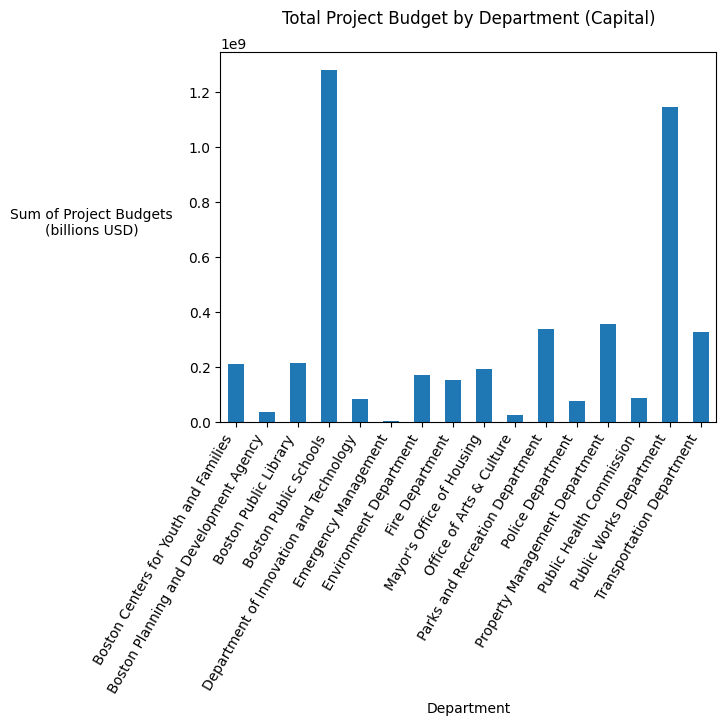

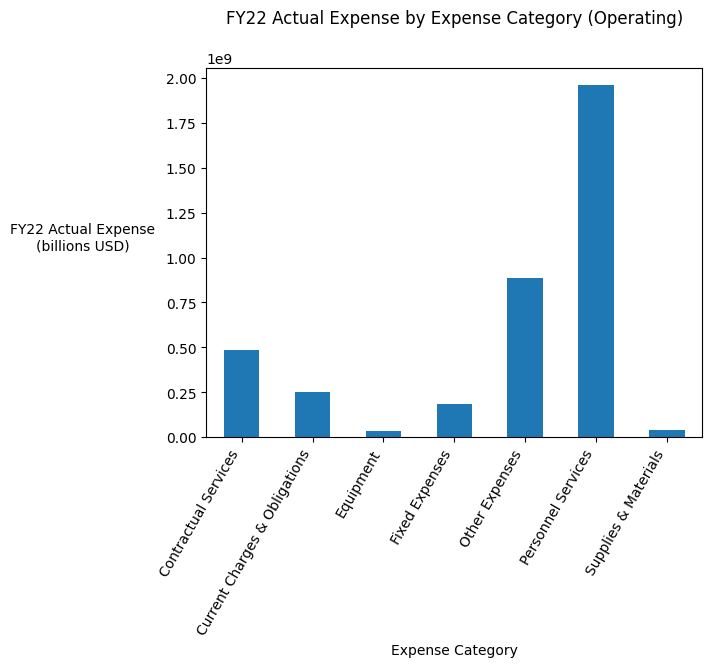

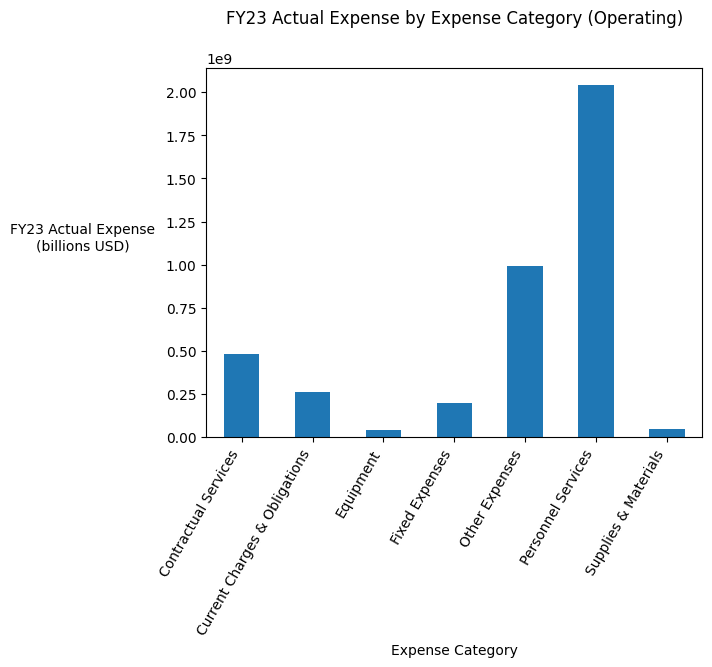

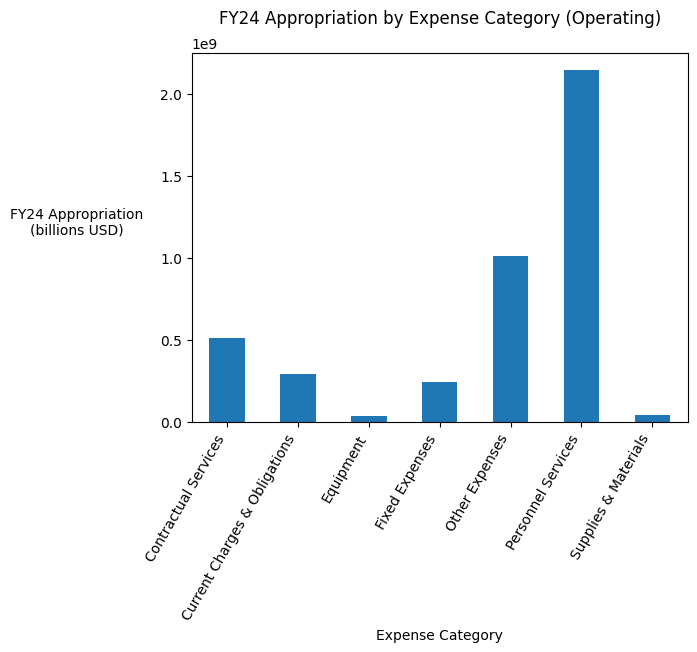

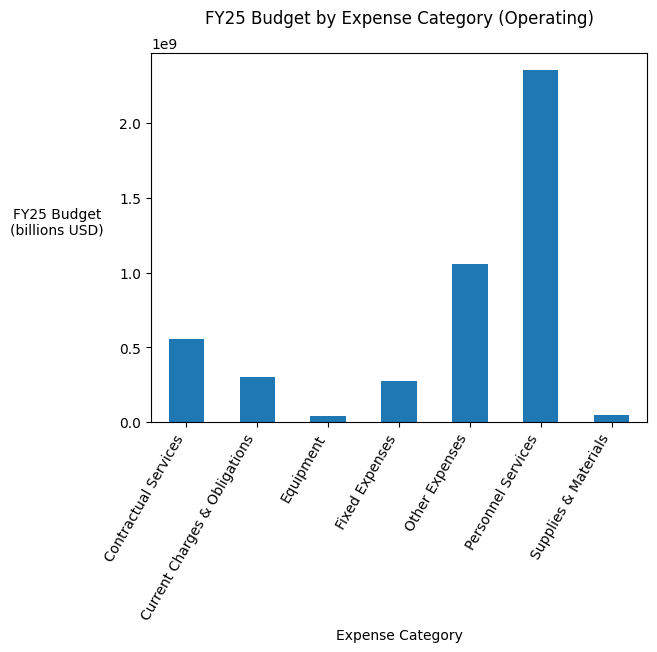

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

# Read the data from the CSV file
cap_budg = pd.read_csv('./data/capital_budget.csv')
op_budg = pd.read_csv('./data/operating_budget.csv')

# Clean the data
op_budg.replace("#Missing", 0, inplace=True)
op_budg['FY22 Actual Expense'] = pd.to_numeric(op_budg['FY22 Actual Expense'].str.replace(',', ''))
op_budg['FY23 Actual Expense'] = pd.to_numeric(op_budg['FY23 Actual Expense'].str.replace(',', ''))
op_budg['FY24 Appropriation'] = pd.to_numeric(op_budg['FY24 Appropriation'].str.replace(',', ''))
op_budg['FY25 Budget'] = pd.to_numeric(op_budg['FY25 Budget'].str.replace(',', ''))

# Plot the capital budget's total project budget for each department
cap_budg.groupby('Department')['Total_Project_Budget'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Sum of Project Budgets\n(billions USD)', rotation=0, labelpad=70)
plt.title('Total Project Budget by Department (Capital)\n')
plt.show()

op_budg.groupby('Expense Category')['FY22 Actual Expense'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY22 Actual Expense\n(billions USD)', rotation=0, labelpad=60)
plt.title('FY22 Actual Expense by Expense Category (Operating)\n')
plt.show()

op_budg.groupby('Expense Category')['FY23 Actual Expense'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY23 Actual Expense\n(billions USD)', rotation=0, labelpad=60)
plt.title('FY23 Actual Expense by Expense Category (Operating)\n')
plt.show()

op_budg.groupby('Expense Category')['FY24 Appropriation'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY24 Appropriation\n(billions USD)', rotation=0, labelpad=60)
plt.title('FY24 Appropriation by Expense Category (Operating)\n')
plt.show()

op_budg.groupby('Expense Category')['FY25 Budget'].sum().plot(kind='bar')
plt.xticks(rotation=60, ha='right')
plt.ylabel('FY25 Budget\n(billions USD)', rotation=0, labelpad=45)
plt.title('FY25 Budget by Expense Category (Operating)\n')
plt.show()

In [2]:
op_budg.head()

,_id,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.90,383743.11,219633.42,234628.00
2,3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000.00
3,4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.30,25350.83,16734.29,20000.00
4,5,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115.00,53000.00


In [2]:
print(op_budg.isna().sum())
op_budg.info()

_id                      0
Cabinet                  0
Dept                     0
Program                  0
Expense Category         0
FY22 Actual Expense    183
FY23 Actual Expense    138
FY24 Appropriation     129
FY25 Budget             94
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  943 non-null    int64  
 1   Cabinet              943 non-null    object 
 2   Dept                 943 non-null    object 
 3   Program              943 non-null    object 
 4   Expense Category     943 non-null    object 
 5   FY22 Actual Expense  760 non-null    float64
 6   FY23 Actual Expense  805 non-null    float64
 7   FY24 Appropriation   814 non-null    float64
 8   FY25 Budget          849 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 66.4+ KB


In [3]:
# Unique values for Cabinet, Dept, Program, Expense Category
print('Cabinet Unique Values:')
print(op_budg['Cabinet'].unique())
print('\nDept Unique Values:')
print(op_budg['Dept'].unique())
print('\nProgram Unique Values:')
print(op_budg['Program'].unique())
print('\nExpense Category Unique Values:')
print(op_budg['Expense Category'].unique())

Cabinet Unique Values:
["Mayor's Cabinet" 'Equity & Inclusion Cabinet' 'OPAT Cabinet'
 'Operations Cabinet' 'Community Engagement Cabinet'
 'Arts & Culture Cabinet' 'Economic Opportunity & Inclusion Cabinet'
 'Worker Empowerment Cabinet' 'Education Cabinet'
 'Environment, Energy & Open Space Cabinet' 'Finance Cabinet'
 'People Operations Cabinet' 'Human Services Cabinet'
 'Public Health Cabinet' 'Housing Cabinet'
 'Information & Technology Cabinet' 'Public Safety Cabinet'
 'Streets Cabinet' 'Planning Cabinet' 'Non-Mayoral Departments' 'Other']

Dept Unique Values:
["Mayor's Office" 'Election Division' 'Listing Board'
 'Intergovernmental Relations' 'Law Department' 'Office of Equity'
 'Office of Diversity' 'Office of Resiliency & Racial Equity'
 'Office of Language & Communications Access' 'Human Right Commission'
 'Office for Immigrant Advancement' "Women's Advancement"
 'Black Male Advancement' 'Fair Housing & Equity' 'LGBTQ+ Advancement'
 'Commission For Persons W/Disabilities'
 'Off

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# Summing expenses by department for each fiscal year
dept_spending = op_budg.groupby('Dept')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
dept_spending = dept_spending.sort_values('FY25 Budget', ascending=False)

print(dept_spending)

                                      FY22 Actual Expense  \
Dept                                                        
Boston Public Schools                    1,294,706,181.37   
Police Department                          420,411,576.37   
Pensions                                   323,684,235.00   
Fire Department                            289,513,751.64   
Charter School Tuition                     229,842,219.00   
...                                                   ...   
Human Right Commission                         370,250.34   
Reserve                                      2,250,273.73   
Unemployment Compensation                      190,161.56   
Office of Diversity                            254,220.28   
Office of Resiliency & Racial Equity         1,740,456.28   

                                      FY23 Actual Expense  FY24 Appropriation  \
Dept                                                                            
Boston Public Schools                    1,3

C:\Users\Ilay2\AppData\Local\Temp\ipykernel_8536\910849222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n.loc['Other'] = other  # Add an 'Other' category


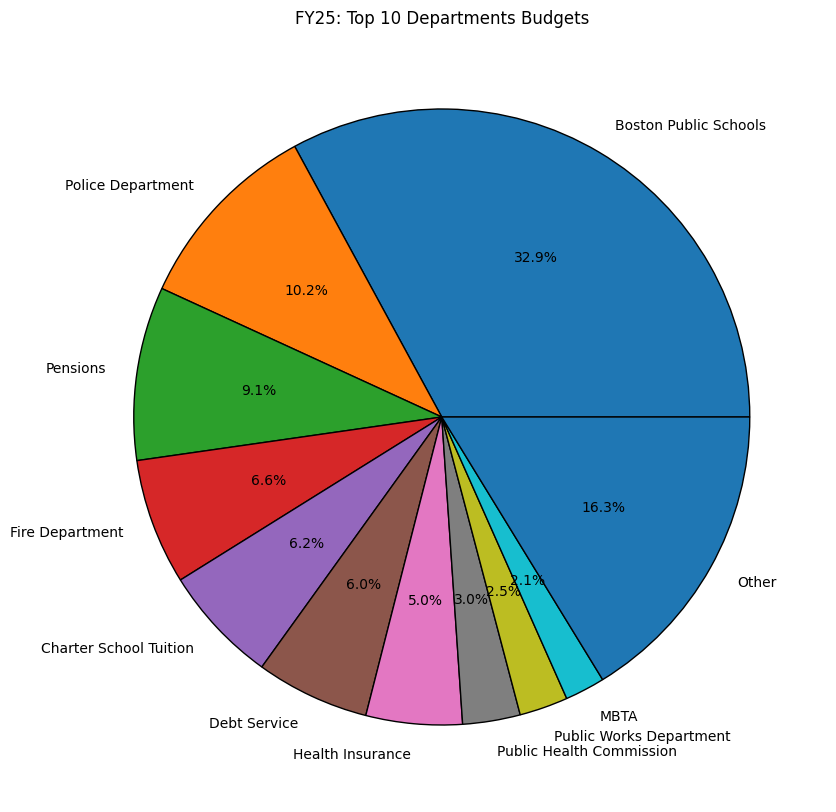

In [6]:
n = 10  # Number of top departments to display
top_n = dept_spending.head(n)  # Get the top 10 departments
other = dept_spending.iloc[n:].sum()  # Sum the remaining departments
top_n.loc['Other'] = other  # Add an 'Other' category

# Plot the pie chart
plt.figure(figsize=(10, 10))
top_n['FY25 Budget'].plot.pie(
    autopct='%1.1f%%', 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('off')
plt.title(f'FY25: Top {n} Departments Budgets')
plt.show()

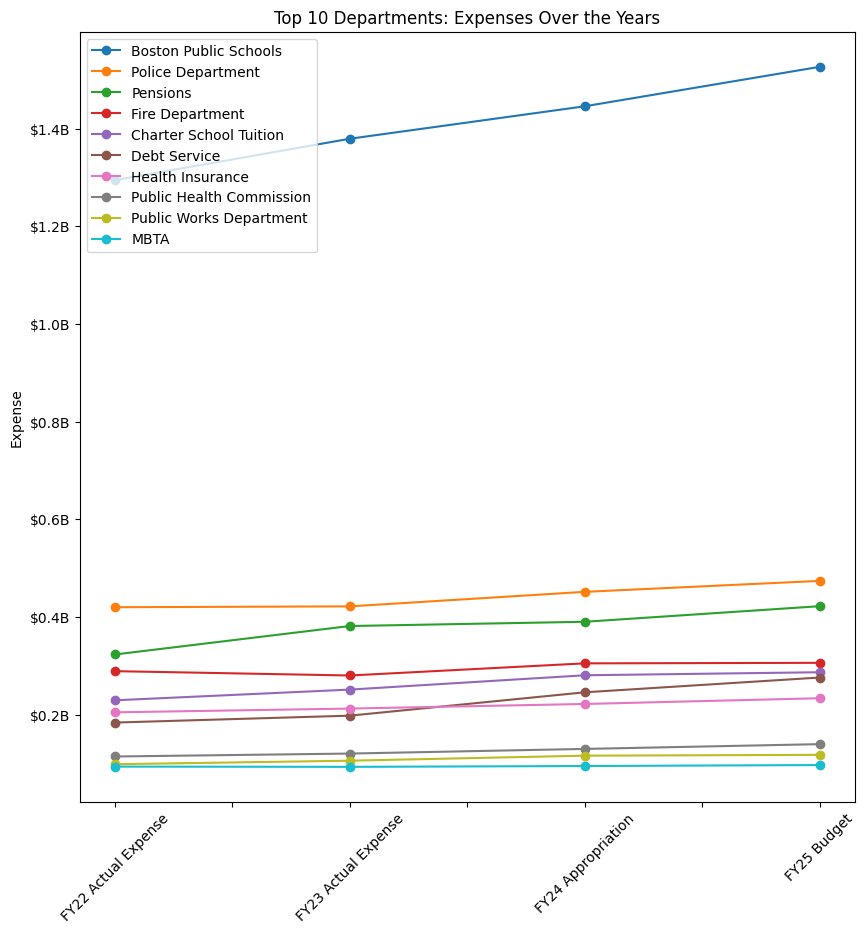

In [7]:
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'  # Format as billions with a "B" suffix

# Define the number of top departments
n = 10
top_n_depts = dept_spending.head(n).index  # Get the top n department names

# Plot expenses over the years for the top n departments
plt.figure(figsize=(10, 10))
for dept in top_n_depts:
    # Filter data for the current department and sum the yearly columns
    dept_data = op_budg[op_budg['Dept'] == dept][['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    
    # Plot the line for this department
    dept_data.plot(marker='o', label=dept)

# Apply the custom y-axis formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

# Add labels and title
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Departments: Expenses Over the Years')
plt.legend(loc='upper left')
plt.show()

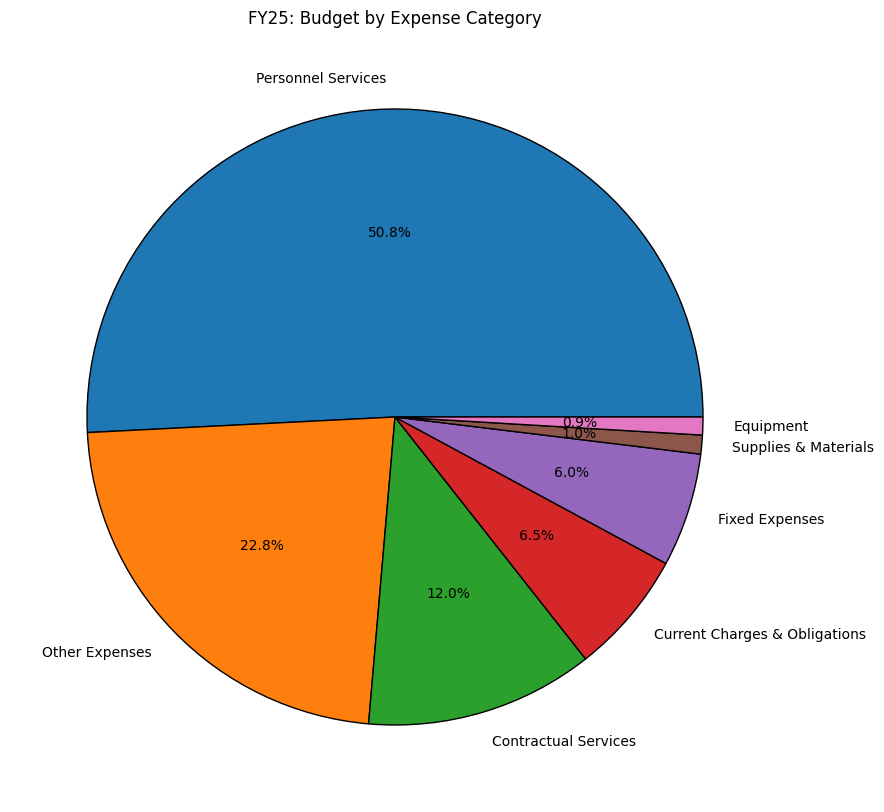

In [8]:
# Summing FY25 Budget by Expense Category
category_spending = op_budg.groupby('Expense Category')['FY25 Budget'].sum()
category_spending = category_spending.sort_values(ascending=False)

# Plot the pie chart
plt.figure(figsize=(10, 10))
category_spending.plot.pie(
    autopct='%1.1f%%', 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('off')
plt.title('FY25: Budget by Expense Category')
plt.show()

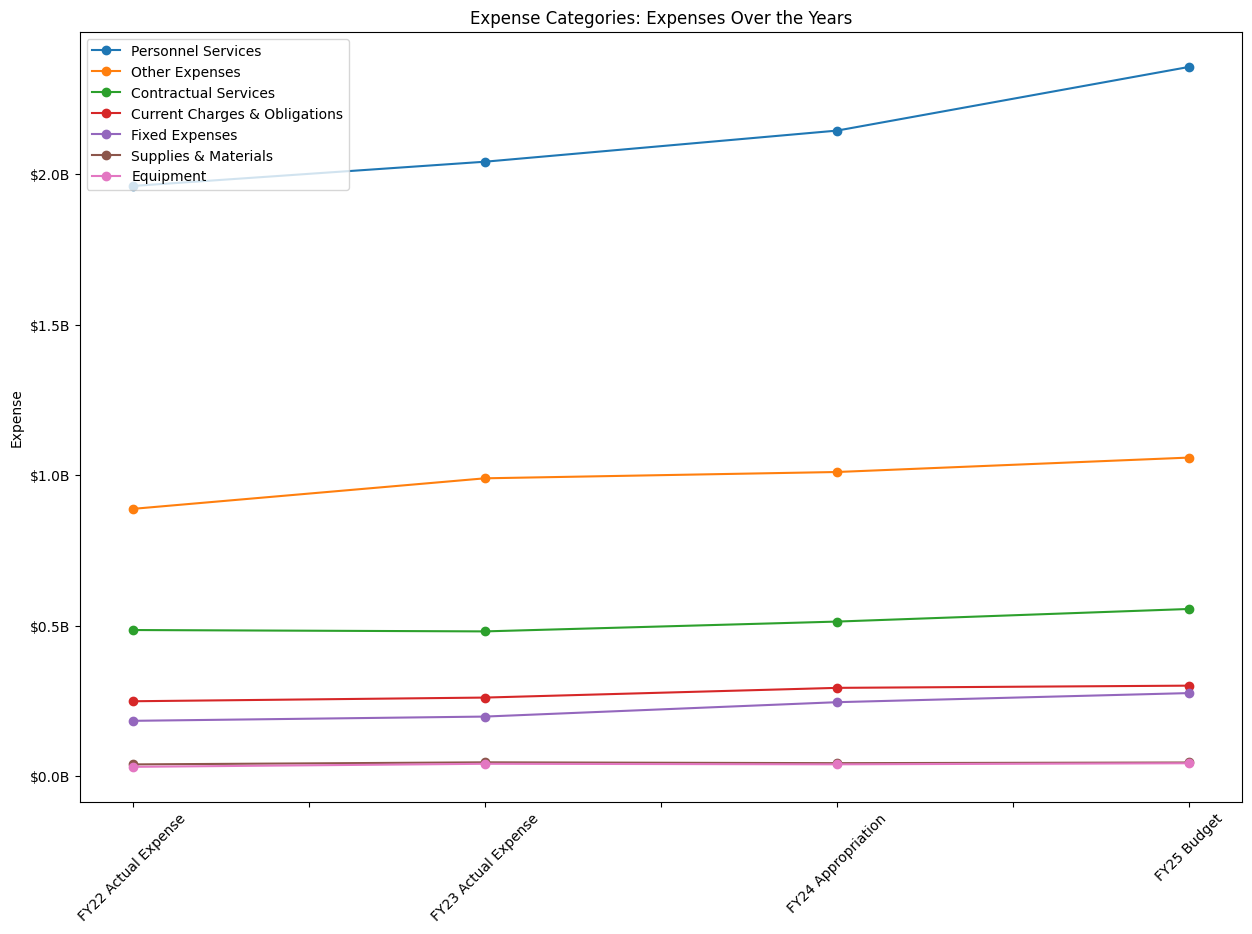

In [9]:
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'  # Format as billions with a "B" suffix

# Plot expenses over the years for each category
plt.figure(figsize=(15, 10))
for category in category_spending.index:
    category_data = op_budg[op_budg['Expense Category'] == category][['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    category_data.plot(marker='o', label=category)

# Apply the custom y-axis formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

# Add labels, title, and legend
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title('Expense Categories: Expenses Over the Years')
plt.legend(loc='upper left')
plt.show()

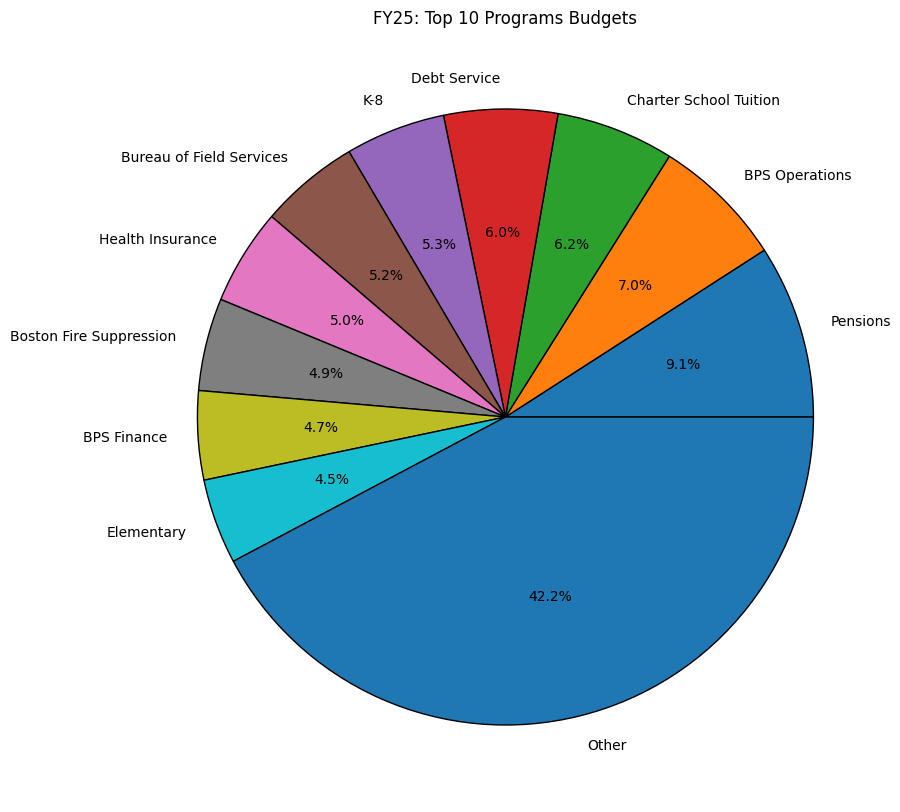

In [10]:
n_program = 10
program_spending = op_budg.groupby('Program')['FY25 Budget'].sum()
program_spending = program_spending.sort_values(ascending=False)

# Select the top 10 programs and sum the rest as "Other"
top_n_program = program_spending.head(n_program)
other = program_spending.iloc[n_program:].sum()
top_n_program.loc['Other'] = other

# Plot the pie chart
plt.figure(figsize=(10, 10))
top_n_program.plot.pie(
    autopct='%1.1f%%', 
    legend=False, 
    wedgeprops={'edgecolor': 'black'}
)
plt.axis('off')
plt.title(f'FY25: Top {n_program} Programs Budgets')
plt.show()

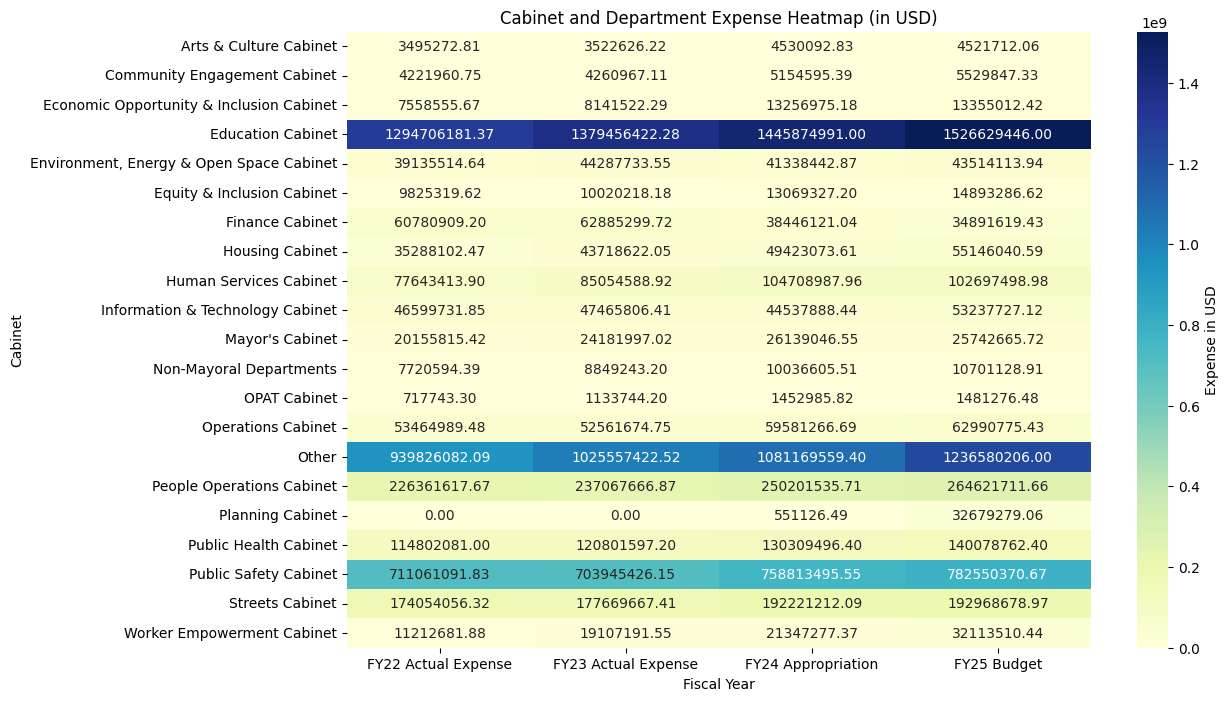

In [11]:
import seaborn as sns

# Assuming op_budg is your DataFrame
# Summing expenses by Cabinet for each fiscal year
heatmap_data = op_budg.groupby('Cabinet')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Expense in USD'})
plt.title("Cabinet and Department Expense Heatmap (in USD)")
plt.xlabel("Fiscal Year")
plt.ylabel("Cabinet")
plt.show()

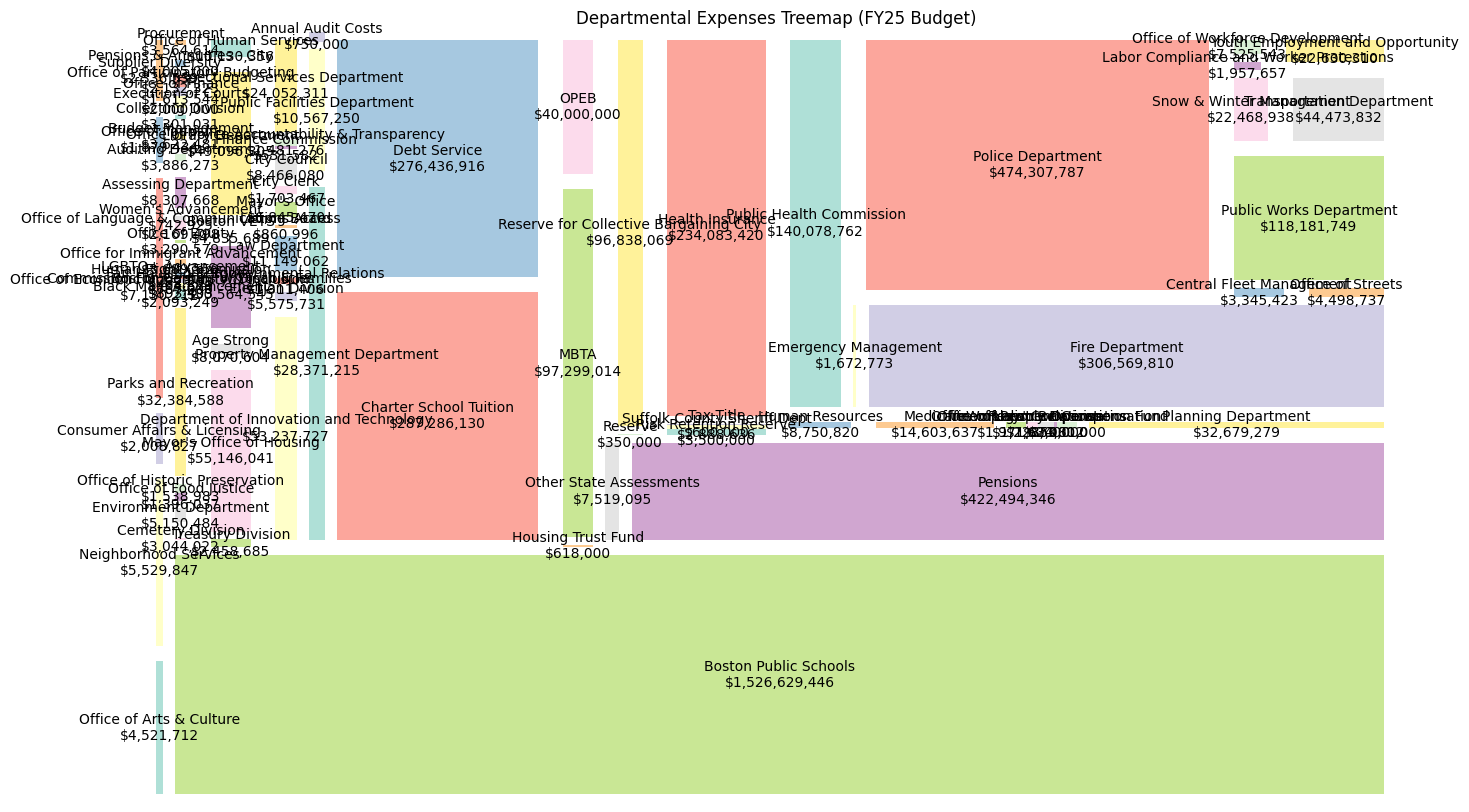

In [13]:
import squarify

# Grouping by Cabinet and Dept to get the sum of FY25 Budget
treemap_data = op_budg.groupby(['Cabinet', 'Dept'])['FY25 Budget'].sum().reset_index()
treemap_data = treemap_data[treemap_data['FY25 Budget'] > 0]

# Creating labels with Department names and budget values
treemap_data['label'] = treemap_data.apply(lambda x: f"{x['Dept']}\n${x['FY25 Budget']:,.0f}", axis=1)

# Defining the sizes and labels for the treemap
sizes = treemap_data['FY25 Budget']
labels = treemap_data['label']
cabinets = treemap_data['Cabinet']

plt.figure(figsize=(16, 10))
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette("Set3", n_colors=len(cabinets)),
              alpha=.7, pad=True)
plt.title("Departmental Expenses Treemap (FY25 Budget)")
plt.axis('off')
plt.show()

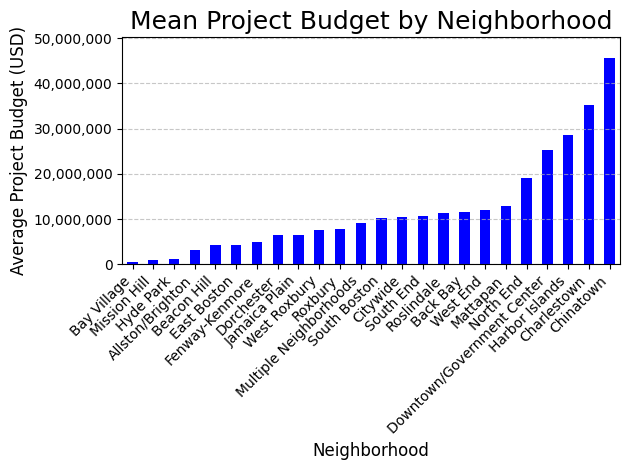

Neighborhood
Bay Village                      508,333.33
Mission Hill                     923,702.00
Hyde Park                      1,257,500.00
Allston/Brighton               3,112,860.00
Beacon Hill                    4,301,250.00
East Boston                    4,318,250.00
Fenway-Kenmore                 4,983,270.20
Dorchester                     6,402,030.21
Jamaica Plain                  6,456,923.08
West Roxbury                   7,687,000.00
Roxbury                        7,819,558.12
Multiple Neighborhoods         9,024,790.25
South Boston                  10,174,998.25
Citywide                      10,426,966.87
South End                     10,689,131.47
Roslindale                    11,368,888.89
Back Bay                      11,615,000.00
West End                      12,000,000.00
Mattapan                      12,845,145.67
North End                     19,101,991.80
Downtown/Government Center    25,246,538.46
Harbor Islands                28,629,690.67
Charlestown        

In [14]:
#Neighborhood spending breakdown. 
neighborhood_budg = cap_budg.groupby('Neighborhood')['Total_Project_Budget'].mean().sort_values(ascending=True)
neighborhood_budg.plot(kind='bar', color='blue')

plt.title('Mean Project Budget by Neighborhood', fontsize=18)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Project Budget (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.ylim(0, neighborhood_budg.max() * 1.1)  

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

print(neighborhood_budg.apply(lambda x: f"{x:,.2f}")) #Formats float to two decimal places & comas

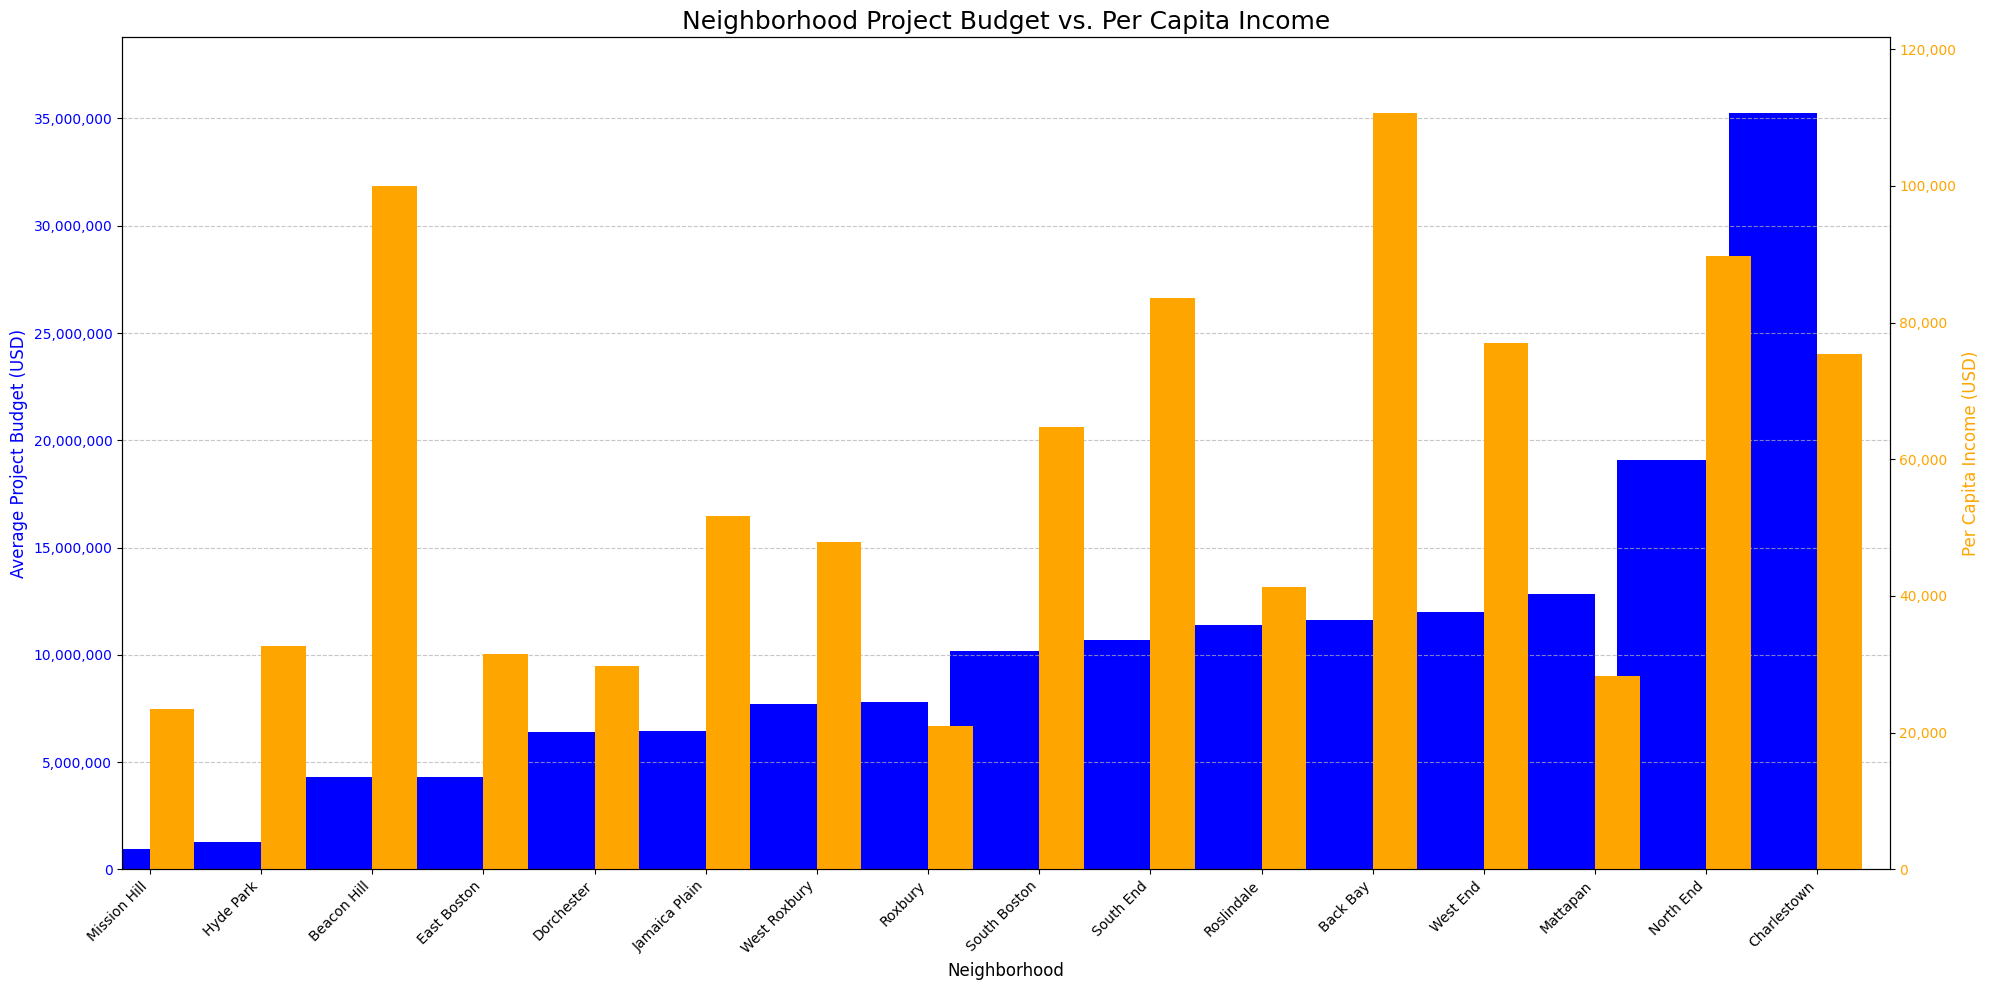

Correlation between Project Budget and Per Capita Income: 0.40


In [ ]:
# Load and clean neighborhood income data
npi = pd.read_csv('./data/2015-2019_neighborhood_tables_2021.12.21.csv')
npi.columns = ['Neighborhood', 'Total Population', 'Income', 'Per Capita Income']
npi = npi[['Neighborhood', 'Total Population', 'Income', 'Per Capita Income']].dropna()
npi = npi.iloc[3:].reset_index(drop=True)
npi['Total Population'] = npi['Total Population'].str.replace(',', '').astype(int)
npi['Income'] = npi['Income'].str.replace(',', '').str.replace('$', '').astype(float)
npi['Per Capita Income'] = npi['Per Capita Income'].str.replace(',', '').str.replace('$', '').astype(float)

# Load and calculate neighborhood budget data


# Merge the two datasets
combined_df = pd.DataFrame({
    'Project Budget': neighborhood_budg,
    'Per Capita Income': npi.set_index('Neighborhood')['Per Capita Income']
}).dropna()  # Ensure no NaN values

# Sort by Project Budget in ascending order
combined_df = combined_df.sort_values(by='Project Budget', ascending=True)

# Create figure and bar chart with dual y-axis
fig, ax1 = plt.subplots(figsize=(20, 10))  # Increase width for more spacing

# Plot Project Budget on primary y-axis
combined_df['Project Budget'].plot(kind='bar', color='blue', ax=ax1, width=0.8, position=1)
ax1.set_ylabel('Average Project Budget (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, combined_df['Project Budget'].max() * 1.1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for Per Capita Income
ax2 = ax1.twinx()
combined_df['Per Capita Income'].plot(kind='bar', color='orange', ax=ax2, width=0.4, position=0)
ax2.set_ylabel('Per Capita Income (USD)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, combined_df['Per Capita Income'].max() * 1.1)

# General plot settings
plt.title('Neighborhood Project Budget vs. Per Capita Income', fontsize=18)
ax1.set_xlabel('Neighborhood', fontsize=12)
ax1.set_xticks(range(len(combined_df)))
ax1.set_xticklabels(combined_df.index, rotation=45, ha='right')

# Adjust space between bars
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin to fit x-axis labels

# Format y-axes with commas for large numbers
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

#DIFFICULT TO SEE RELATIONSHIP BETWEEN NEIGHBORHOOD SPENDING AND INCOME

# Disable scientific notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate the correlation coef
correlation = combined_df['Project Budget'].corr(combined_df['Per Capita Income'])
print(f"Correlation between Project Budget and Per Capita Income: {correlation:.2f}")
    #A positive correlation (e.g., > 0.5) would suggest that neighborhoods with higher per capita incomes tend to have higher spending, 
    #negative correlation would suggest the opposite. Values around 0 indicate weak or no linear relationship.



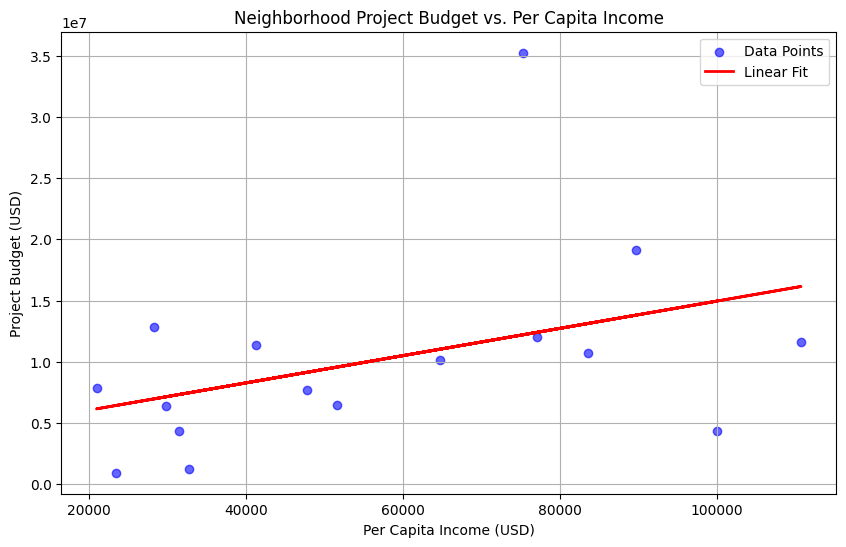

In [24]:
from sklearn.linear_model import LinearRegression

X = combined_df[['Per Capita Income']].values
Y = combined_df['Project Budget'].values

model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Per Capita Income'], combined_df['Project Budget'], color='blue', alpha=0.6, label='Data Points')
plt.plot(combined_df['Per Capita Income'], y_pred, color='red', linewidth=2, label='Linear Fit')
plt.title('Neighborhood Project Budget vs. Per Capita Income')
plt.xlabel('Per Capita Income (USD)')
plt.ylabel('Project Budget (USD)')
plt.grid(True)
plt.legend()

plt.show()